* 均匀分布 uniform
* 正态分布 norm
* 贝塔分布 beta


* 伯努利分布 bernoulli
* 几何分布 geom
* 泊松分布 poisson

In [8]:
import scipy.stats as ss
import matplotlib.pyplot as plt

# 所有都是 cv_continuous 连续, rv_discrete 离散随机变量 的派生

# 生成 100 个 [0, 1] 均匀分布的随机数
X = ss.uniform.rvs(size=100)

# 生成 20 个服从 [1, 2] 正态分布的随机数
X = ss.norm.rvs(size=200, loc=1, scale=2)

python 中输出正态分布函数和分布图

$$
f(x) = \frac{1}{\sqrt{2\pi} \sigma} exp(\frac{(x - \mu)^2}{2 \sigma^2})
$$

In [9]:
import numpy as np
X = ss.norm()
Y = ss.norm(loc=1.0, scale=2.0)

(0.9811608064962176, 2.021403933867381)

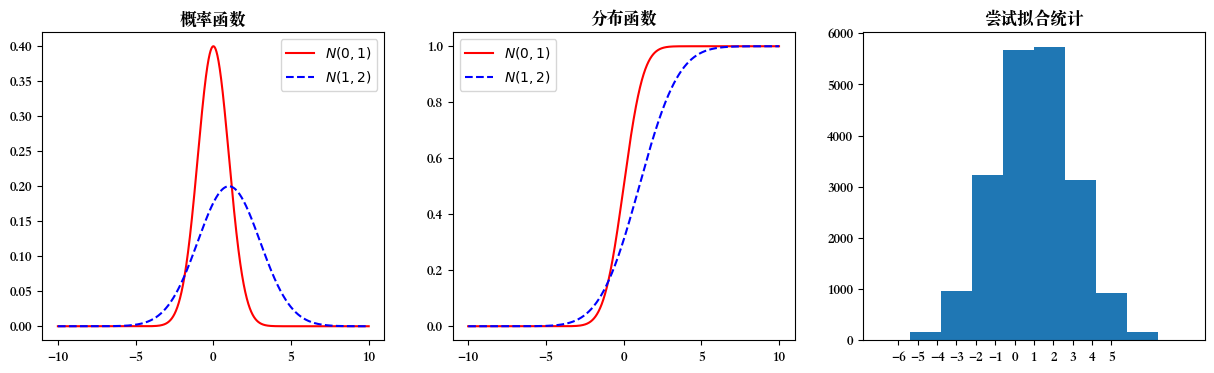

In [23]:
t = np.arange(-10, 10, 0.01)

# 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # type: plt.Figure, list[plt.Axes]

axes[0].plot(t, X.pdf(t), label="$N(0, 1)$", color='r')
axes[0].plot(t, Y.pdf(t), 'b--', label='$N(1, 2)$')
axes[0].set_title("概率密度函数")
axes[0].legend()


axes[1].plot(t, X.cdf(t), label="$N(0, 1)$", color='r')
axes[1].plot(t, Y.cdf(t), 'b--', label='$N(1, 2)$')
axes[1].set_title("分布函数")
axes[1].legend()


Y1 = Y.rvs(size=20000)
axes[2].hist(Y1)
axes[2].set_title("尝试拟合统计")
plt.xticks(np.arange(-6, 6, 1))


ss.norm.fit(Y1)

# 离散概率密度

In [47]:
xk = range(5)
pk = [1/16, 1/4, 3/8, 1/4, 1/16]

# 离散分布
custome = ss.rv_discrete(values=(xk, pk))

# 生成离散分布的值
custome1 = custome.rvs(size=20)
custome1.reshape(-1, 10)

array([[2, 1, 3, 2, 3, 2, 3, 3, 1, 0],
       [2, 3, 2, 2, 4, 2, 3, 1, 2, 3]])

Text(0.5, 1.0, '分布函数')

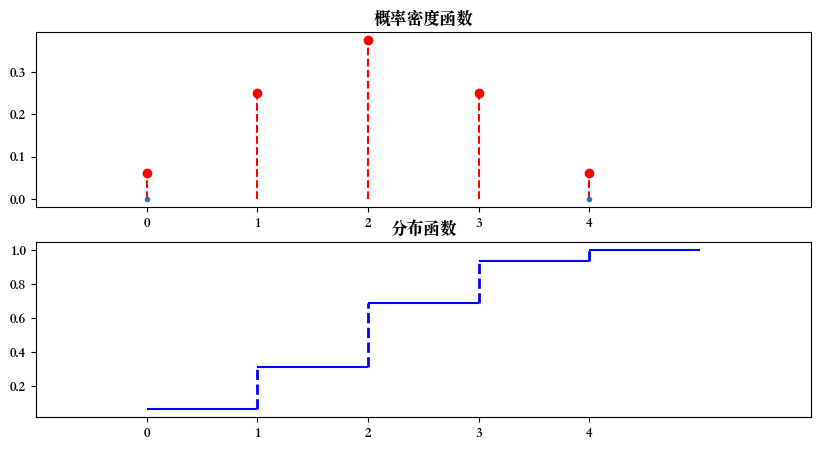

In [61]:
fig, (ax0, ax1) = plt.subplots(2, figsize=(10, 5)) # type: plt.Figure, (plt.Axes, plt.Axes)

ax0.set_title("概率密度函数")

ax0.stem(xk, pk, markerfmt='ro', linefmt='r--', basefmt=".")
# # 画点
# ax0.plot(xk, pk, 'ro', ms=8, mec='r')
# # 划线
# ax0.vlines(xk, 0, pk, colors='r', linestyles='-', lw=2)
ax0.set_xlim(-1, 6)
ax0.set_xticks(np.arange(0, 5, 1))

# 分布函数
pk1 = custome.cdf(xk)
x_max = range(1, 6)
xk1 = range(1, 5)
# 为了生成横线
y_min = pk1[0:4]
y_max = pk1[1:5]

ax1.hlines(pk1, xk, x_max, linestyles='-', colors='b')
ax1.set_xlim(-1, 6)
ax1.set_xticks(np.arange(0, 5, 1))

ax1.vlines(xk1, y_min, y_max, colors='b', linestyles='--', lw=2)
ax1.set_title("分布函数")

<StemContainer object of 3 artists>

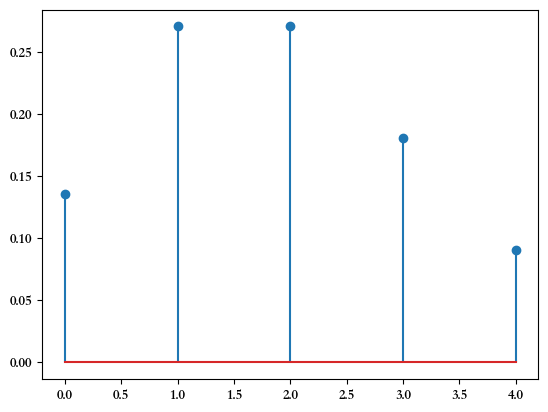

In [81]:
# 柏松分布
mu = 2
poisson = ss.poisson(mu)
plt.stem(poisson.pmf(X))

In [87]:
from math import factorial

counter, times = 0, int(1e4)

for i in range(times):
    if len({np.random.randint(1, 365) for _ in range(50)}) != 50:
        counter += 1

counter / times

(0.9719, 3.011080895682828e+121)

In [89]:
input_prob = [0.3, 0.5, 0.7]

H = 49
T = 31

p = 0

def max_prob():
    max_prob_value = -1
    max_person = 1
    for (i, v) in enumerate(input_prob):
        current_prob = prob(v)
        if current_prob > max_prob_value:
            max_prob_value = current_prob
            max_person = i
    return max_person + 1, max_prob_value
      
def prob(v):
    f1 = factorial(H + T) / (factorial(H) * factorial(T))
    f2 = (v ** H) * ((1.0 - v) ** T)
    return f1 * f2


max_prob()

(3, 0.022707218690321822)